## Log regression


Here we will load in the data and first look at our target variable


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
df = pd.read_excel('../default_of_credit_card_clients.xls', header=0)

df.columns = df.iloc[0,:]

df.rename(index=str, columns={"default payment next month": "Y"}, inplace=True)

df.drop('ID', inplace=True, axis=0)
X = df.iloc[:,:-1]
y = df.Y

df.head()

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# I am interested in having a general idea of the default probability
y.sum() / len(y)

0.2212

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 

In [5]:
#create the classifier
classifier = DecisionTreeClassifier(max_depth=10, random_state=14) 
# training the classifier
classifier.fit(X_train, y_train)
# do our predictions on the test
predictions = classifier.predict(X_test)
# see how good we did on the test
accuracy_score(y_true = y_test, y_pred = predictions)

NameError: name 'X_train' is not defined

In [6]:
#find out missing values
names = []
value = []
for col in df.columns:
    names.append(col)
    value.append(df[col].isnull().sum())
    print("number of missing values: ", names[-1], value[-1],"""     """, "Percentage of missing values:", names[-1], round((value[-1]/682)*100))
    
  

number of missing values:  LIMIT_BAL 0       Percentage of missing values: LIMIT_BAL 0.0
number of missing values:  SEX 0       Percentage of missing values: SEX 0.0
number of missing values:  EDUCATION 0       Percentage of missing values: EDUCATION 0.0
number of missing values:  MARRIAGE 0       Percentage of missing values: MARRIAGE 0.0
number of missing values:  AGE 0       Percentage of missing values: AGE 0.0
number of missing values:  PAY_0 0       Percentage of missing values: PAY_0 0.0
number of missing values:  PAY_2 0       Percentage of missing values: PAY_2 0.0
number of missing values:  PAY_3 0       Percentage of missing values: PAY_3 0.0
number of missing values:  PAY_4 0       Percentage of missing values: PAY_4 0.0
number of missing values:  PAY_5 0       Percentage of missing values: PAY_5 0.0
number of missing values:  PAY_6 0       Percentage of missing values: PAY_6 0.0
number of missing values:  BILL_AMT1 0       Percentage of missing values: BILL_AMT1 0.0
number

Since every column is an object, we'll have to convert them to a numeric type. We'll use the data dictionary from UCI Machine Learning Repository website as a preliminary data dictionary to guide us.

From the UCI Machine Learning Repository website:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables: 
- X1 (LIMIT_BIL): Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- X2 (SEX): (1 = male; 2 = female). 
- X3 (EDUCATION): (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- X4 (MARITAL STATUS): (1 = married; 2 = single; 3 = others). 
- X5 (AGE): (year). 
- X6 - X11 (PAY_0 : PAY_6): History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
- X12-X17 (BILL_AMT1 : BILL_AMT6): Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
- X18-X23 (PAY_AMT1 : PAY_AMT6): Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.
- Y: Made a default payment (Yes = 1, No = 0)

All of these columns should be columns should be numeric, so let's convert it all to numeric

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019) 

In [ ]:
y

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

In [37]:
df["PAY_AMT12'"] = df.PAY_AMT1 / (df.BILL_AMT2+0.00000000000001)
df["PAY_AMT2'"] = df.PAY_AMT2 / (df.BILL_AMT2+0.00000000000001)
df["PAY_AMT3'"] = df.PAY_AMT3 / (df.BILL_AMT3+0.00000000000001)
df["PAY_AMT4'"] = df.PAY_AMT4 / (df.BILL_AMT4+0.00000000000001)
df["PAY_AMT5'"] = df.PAY_AMT5 / (df.BILL_AMT5+0.00000000000001)
df["PAY_AMT6'"] = df.PAY_AMT6 / (df.BILL_AMT6+0.00000000000001)

In [14]:
df["PAY_AMT1'"].mean()

9475266666666668.0

AxesSubplot(0.125,0.125;0.775x0.755)


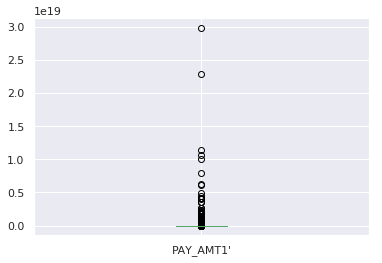

In [39]:
print(df["PAY_AMT1'"].plot(kind = "box"))

AxesSubplot(0.125,0.125;0.775x0.755)


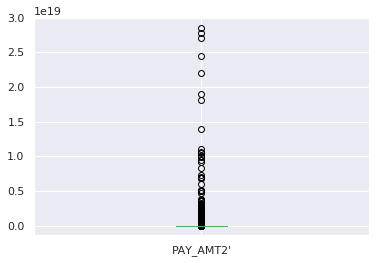

In [19]:
print(df["PAY_AMT2'"].plot(kind = "box"))

AxesSubplot(0.125,0.125;0.775x0.755)


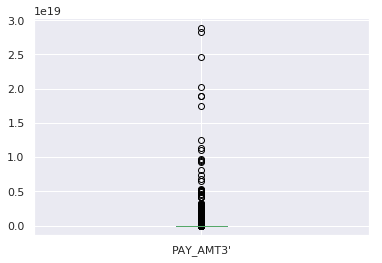

In [21]:
print(df["PAY_AMT3'"].plot(kind="box"))


AxesSubplot(0.125,0.125;0.775x0.755)


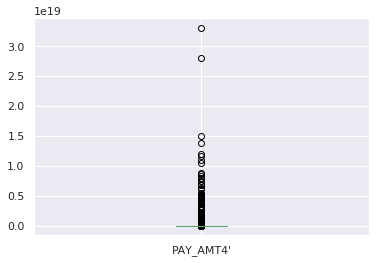

In [22]:
print(df["PAY_AMT4'"].plot(kind="box"))


AxesSubplot(0.125,0.125;0.775x0.755)


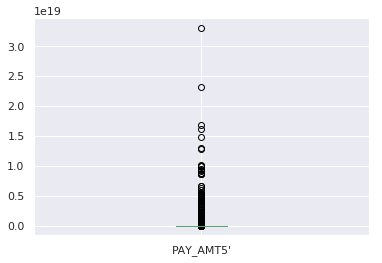

In [23]:

print(df["PAY_AMT5'"].plot(kind="box"))


AxesSubplot(0.125,0.125;0.775x0.755)


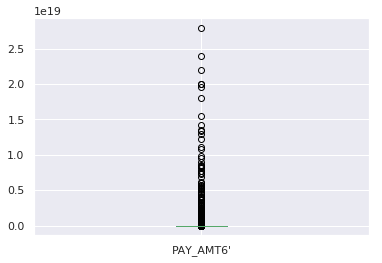

In [24]:

print(df["PAY_AMT6'"].plot(kind="box"))

In [33]:
if x in df["PAY_AMT6'"]

SyntaxError: invalid syntax (<ipython-input-33-ebb60987e9c7>, line 1)

In [41]:
print(df["PAY_AMT6'"].values.count > 1)

AttributeError: 'numpy.ndarray' object has no attribute 'count'